![BTS](img/Logo-BTS.jpg)

# Session 5: Text Mining (II)

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-10-19)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/05-Text-Mining-II.ipynb)

In [1]:
# Source: http://billchambers.me/tutorials/2014/12/21/tf-idf-explained-in-python.html

t0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
t1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
t2 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
t3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
t4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
t5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
t6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

## Exercise 1: Jaccard similarity

1. Write a function `lemmatize` that receives a spaCy `Doc` and returns a list of lemmas as strings, removing stopwords, punctuation signs and whitespace
2. Write a function that receives two spaCy `Doc`s and returns a floating point number representing the Jaccard similarity (see formula below) (hint: use [`set`s](https://docs.python.org/3/library/stdtypes.html#set))
3. Compute the Jaccard similarity between `t0` and `t1`
4. Create a pandas `DataFrame` that holds the Jaccard similarity of all the text combinations from `t0` to `t6` (hint: use [`enumerate`](http://book.pythontips.com/en/latest/enumerate.html#enumerate))

$$ J(A,B) = {{|A \cap B|}\over{|A \cup B|}} $$

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
nlp = spacy.load("en")

In [4]:
def lemmatize(doc):
    return [token.lemma_ for token in doc if not
           (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)]

In [5]:
lemmatize(nlp(t0))

['china',
 'strong',
 'economy',
 'grow',
 'rapid',
 'pace',
 'politically',
 'differ',
 'greatly',
 'economy']

In [6]:
def jaccard(doc1, doc2):
    s1 = set(lemmatize(doc1))
    s2 = set(lemmatize(doc2))
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [7]:
jaccard(nlp(t0), nlp(t1))

0.06666666666666667

In [8]:
import numpy as np
import pandas as pd

In [9]:
data = np.zeros((7, 7))
docs = [nlp(text) for text in (t0, t1, t2, t3, t4, t5, t6)]
for ii, doc_a in enumerate(docs):
    for jj, doc_b in enumerate(docs):
        data[ii, jj] = jaccard(doc_a, doc_b)

pd.DataFrame(data)

,0,1,2,3,4,5,6
0,1.000000,0.066667,0.000000,0.058824,0.000000,0.050000,0.000
1,0.066667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000
2,0.000000,0.000000,1.000000,0.045455,0.235294,0.040000,0.000
3,0.058824,0.000000,0.045455,1.000000,0.000000,0.105263,0.125
4,0.000000,0.000000,0.235294,0.000000,1.000000,0.000000,0.000
5,0.050000,0.000000,0.040000,0.105263,0.000000,1.000000,0.000
6,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,1.000


## Exercise 2: TF-IDF

1. Write a function `tf` that receives a string and a spaCy `Doc` and returns the number of times the word appears in the `lemmatize`d `Doc`
2. Write a function `idf` that receives a string and a list of spaCy `Doc`s and returns the number of docs that contain the word
3. Write a function `tf_idf` that receives a string, a spaCy `Doc` and a list of spaCy `Doc`s and returns the product of `tf(t, d) · idf(t, D)`.
4. Write a function `all_lemmas` that receives a list of `Doc`s and returns a `set` of all available `lemma`s
5. Write a function `tf_idf_doc` that receives a `Doc` and a list of `Doc`s and returns a dictionary of `{lemma: TF-IDF value}`, corresponding to each the lemmas of all the available documents
6. Write a function `tf_idf_scores` that receives a list of `Doc`s and returns a `DataFrame` displaying the lemmas in the columns and the documents in the rows.
7. Visualize the TF-IDF, like this:

![TF-IDF](img/tf-idf.png)

In [9]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en')

In [3]:
from collections import Counter

In [4]:
Counter(['a', 'a', 'b'])

Counter({'a': 2, 'b': 1})

In [5]:
_['a']

2

In [6]:
_4['c']

0

In [12]:
['a', 'b', 'b'].count('c')

0

In [89]:
def lemmatize(doc):
    return [
        token.lemma_
        for token in doc
        if not token.is_space and not token.is_punct and not token.lower_ in STOP_WORDS
        and not token.tag_ == "POS"
    ]

In [20]:
def tf(word, doc):
    lemmas = lemmatize(doc)
    #return Counter(lemmas)[word]
    return lemmas.count(word)

In [21]:
t1

'At last, China seems serious about confronting an endemic problem: domestic violence and corruption.'

In [22]:
tf("china", nlp(t1))

1

In [46]:
count = 1
1 / count if count else 0

1.0

In [59]:
def tf(word, doc):
    lemmas = lemmatize(doc)
    #return Counter(lemmas)[word]
    print(lemmas.count(word))

In [60]:
tf("china", nlp(t1))

1


In [61]:
def tf(word, doc):
    lemmas = lemmatize(doc)
    return Counter(lemmas)[word]

In [62]:
tf("china", nlp(t1))

1

In [55]:
result is None

True

In [51]:
count = 2
if count:
    print(1 / count)
else:
    print(0)

0.5


In [72]:
def foo(a):
    return a > 0

In [73]:
foo(1)

True

In [75]:
foo(-1)

False

In [69]:
def foo(a):
    condition = a > 0
    if condition:
        return True
    else:
        return False

In [70]:
foo(1)

True

In [71]:
foo(-1)

False

In [64]:
if "":
    print("Empty string is true")

In [67]:
if [0]:
    print("Empty list is true")

Empty list is true


In [63]:
if 0:
    print("Zero is true")

In [42]:
def idf(word, docs):
    count = 0
    for doc in docs:
        if word in lemmatize(doc):
            count += 1

    # We don't need to account for the 0 case since all the words will be in at least 1 document
    return 1 / count  # if count else 0

In [39]:
t1

'At last, China seems serious about confronting an endemic problem: domestic violence and corruption.'

In [40]:
docs = [nlp(text) for text in (t0, t1, t2, t3, t4, t5, t6)]

In [41]:
idf("china", docs)

0.5

In [43]:
def tf_idf(word, doc, docs):
    return tf(word, doc) * idf(word, docs)

In [44]:
tf_idf("china", nlp(t1), docs)

0.5

In [90]:
def all_lemmas(docs):
    lemmas = set()
    for doc in docs:
        #lemmas = lemmas.union(set(lemmatize(doc)))
        #lemmas = set(lemmatize(doc))
        lemmas.update(set(lemmatize(doc)))

    return lemmas

In [91]:
print(all_lemmas(docs))

{'abe', 'economic', 'russian', 'tumble', 'endemic', 'cuba', 'fall', 'problem', 'grow', 'thing', 'politically', 'pace', 'heal', 'find', 'be', 'country', 'confront', 'horse', 'value', 'ask', 'china', 'people', 'abenomics', 'ruble', 'rapid', 'strong', 'daily', 'rid', 'hunt', 'shirt', 'greatly', 'shinzo', 'turmoil', 'russia', 'domestic', 'view', 'accelerate', 'economy', 'minister', 'work', 'japan', 'putin', 'deer', 'sanction', 'violence', 'vladimir', 'hard', 'future', 'differ', 'ease', 'fix', 'corruption', 'obama', 'prime'}


In [98]:
def tf_idf_doc(doc, docs):
    lemmas = all_lemmas(docs)
    values = {}
#     for lemma in lemmas:
#         values[lemma] = tf_idf(lemma, doc, docs)

#     return values
    return {lemma: tf_idf(lemma, doc, docs) for lemma in lemmas}

In [100]:
print(tf_idf_doc(nlp(t1), docs))

{'abe': 0.0, 'economic': 0.0, 'russian': 0.0, 'tumble': 0.0, 'endemic': 1.0, 'cuba': 0.0, 'fall': 0.0, 'problem': 1.0, 'grow': 0.0, 'thing': 0.0, 'politically': 0.0, 'pace': 0.0, 'heal': 0.0, 'find': 0.0, 'be': 0.0, 'country': 0.0, 'confront': 1.0, 'horse': 0.0, 'value': 0.0, 'ask': 0.0, 'china': 0.5, 'people': 0.0, 'abenomics': 0.0, 'ruble': 0.0, 'rapid': 0.0, 'strong': 0.0, 'daily': 0.0, 'rid': 0.0, 'hunt': 0.0, 'shirt': 0.0, 'greatly': 0.0, 'shinzo': 0.0, 'turmoil': 0.0, 'russia': 0.0, 'domestic': 1.0, 'view': 0.0, 'accelerate': 0.0, 'economy': 0.0, 'minister': 0.0, 'work': 0.0, 'japan': 0.0, 'putin': 0.0, 'deer': 0.0, 'sanction': 0.0, 'violence': 1.0, 'vladimir': 0.0, 'hard': 0.0, 'future': 0.0, 'differ': 0.0, 'ease': 0.0, 'fix': 0.0, 'corruption': 1.0, 'obama': 0.0, 'prime': 0.0}


In [102]:
import pandas as pd

In [104]:
ll = ['a', 'b', 'c']
ll.append('d')
ll

['a', 'b', 'c', 'd']

In [109]:
ll = ['a', 'b', 'c']
ll + ['d', 'e']

['a', 'b', 'c', 'd', 'e']

In [106]:
ll = ['a', 'b', 'c']
ll.extend(['d', 'e'])
ll

['a', 'b', 'c', 'd', 'e']

In [101]:
def tf_idf_scores(docs):
    rows = []
    for doc in docs:
        rows.append(tf_idf_doc(doc, docs))
    
    return pd.DataFrame(rows)

In [110]:
res = tf_idf_scores(docs)
res

,abe,abenomics,accelerate,ask,be,china,confront,corruption,country,cuba,...,shirt,strong,thing,tumble,turmoil,value,view,violence,vladimir,work
0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.5
4,0.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

In [114]:
import seaborn as sns

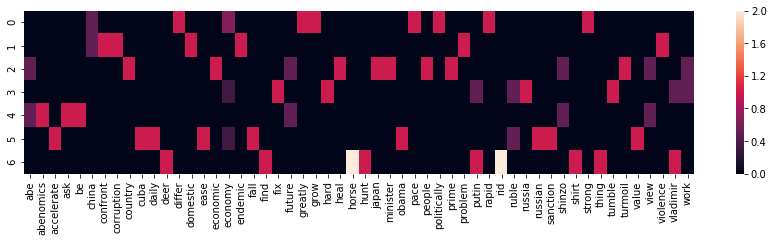

In [118]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.heatmap(res, ax=ax)

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

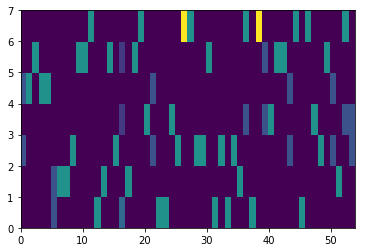

In [113]:
plt.pcolor(res)

In [10]:
from collections import Counter

In [11]:
def tf(word, doc):
    counts = Counter(lemmatize(doc))
    return counts[word]

In [12]:
tf('economy', nlp(t0))

2

In [13]:
def idf(word, docs):
    count = 0
    for doc in docs:
        if word in lemmatize(doc):
            count += 1
    return 1 / count

In [14]:
idf('economy', docs)

0.3333333333333333

In [15]:
def tf_idf(word, doc, docs):
    assert doc in docs
    return tf(word, doc) * idf(word, docs)

In [16]:
tf_idf('economy', docs[0], docs)

0.6666666666666666

In [17]:
def all_lemmas(docs):
    lemmas = set()
    for doc in docs:
        lemmas.update(lemmatize(doc))
    return lemmas

In [18]:
print(all_lemmas(docs))

{'sanction', 'future', 'cuba', 'value', 'thing', 'shirt', 'tumble', 'turmoil', 'deer', 'violence', 'russia', 'obama', 'minister', 'china', 'differ', 'ruble', 'japan', 'accelerate', 'be', 'economy', 'pace', 'people', 'view', 'abenomics', 'shinzo', 'daily', "'s", 'rid', 'putin', 'country', 'rapid', 'find', 'corruption', 'ask', 'horse', 'work', 'fix', 'confront', 'greatly', 'heal', 'hard', 'strong', 'russian', 'endemic', 'ease', 'abe', 'hunt', 'fall', 'problem', 'grow', 'prime', 'politically', 'economic', 'vladimir', 'domestic'}


In [19]:
def tf_idf_doc(doc, docs):
    lemmas = all_lemmas(docs)
    res = {}
    for lemma in lemmas:
        res[lemma] = tf_idf(lemma, doc, docs)
    return res

In [20]:
print(tf_idf_doc(docs[0], docs))

{'sanction': 0.0, 'future': 0.0, 'cuba': 0.0, 'value': 0.0, 'thing': 0.0, 'shirt': 0.0, 'tumble': 0.0, 'turmoil': 0.0, 'deer': 0.0, 'violence': 0.0, 'russia': 0.0, 'obama': 0.0, 'minister': 0.0, 'china': 0.5, 'differ': 1.0, 'ruble': 0.0, 'japan': 0.0, 'accelerate': 0.0, 'be': 0.0, 'economy': 0.6666666666666666, 'pace': 1.0, 'people': 0.0, 'view': 0.0, 'abenomics': 0.0, 'shinzo': 0.0, 'daily': 0.0, "'s": 0.0, 'rid': 0.0, 'putin': 0.0, 'country': 0.0, 'rapid': 1.0, 'find': 0.0, 'corruption': 0.0, 'ask': 0.0, 'horse': 0.0, 'work': 0.0, 'fix': 0.0, 'confront': 0.0, 'greatly': 1.0, 'heal': 0.0, 'hard': 0.0, 'strong': 1.0, 'russian': 0.0, 'endemic': 0.0, 'ease': 0.0, 'abe': 0.0, 'hunt': 0.0, 'fall': 0.0, 'problem': 0.0, 'grow': 1.0, 'prime': 0.0, 'politically': 1.0, 'economic': 0.0, 'vladimir': 0.0, 'domestic': 0.0}


In [21]:
def tf_idf_scores(docs):
    lemmas = all_lemmas(docs)
    rows = []
    for doc in docs:
        rows.append(tf_idf_doc(doc, docs))

    return pd.DataFrame(rows)

In [22]:
tb = tf_idf_scores(docs)
tb

,'s,abe,abenomics,accelerate,ask,be,china,confront,corruption,country,...,shirt,strong,thing,tumble,turmoil,value,view,violence,vladimir,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.5
4,0.0,0.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
5,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
tb / tb.max().max()

,'s,abe,abenomics,accelerate,ask,be,china,confront,corruption,country,...,shirt,strong,thing,tumble,turmoil,value,view,violence,vladimir,work
0,0.00,0.00,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
1,0.00,0.00,0.0,0.0,0.0,0.0,0.25,0.5,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.5,0.00,0.00
2,0.25,0.25,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.5,0.0,0.25,0.0,0.00,0.25
3,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.00,0.0,0.25,0.25
4,0.00,0.25,0.5,0.0,0.5,0.5,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.00,0.00
5,0.25,0.00,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.00,0.0,0.00,0.00
6,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.5,0.0,0.5,0.0,0.0,0.0,0.00,0.0,0.50,0.00


In [24]:
tb.columns

Index([''s', 'abe', 'abenomics', 'accelerate', 'ask', 'be', 'china',
       'confront', 'corruption', 'country', 'cuba', 'daily', 'deer', 'differ',
       'domestic', 'ease', 'economic', 'economy', 'endemic', 'fall', 'find',
       'fix', 'future', 'greatly', 'grow', 'hard', 'heal', 'horse', 'hunt',
       'japan', 'minister', 'obama', 'pace', 'people', 'politically', 'prime',
       'problem', 'putin', 'rapid', 'rid', 'ruble', 'russia', 'russian',
       'sanction', 'shinzo', 'shirt', 'strong', 'thing', 'tumble', 'turmoil',
       'value', 'view', 'violence', 'vladimir', 'work'],
      dtype='object')

In [25]:
tb

,'s,abe,abenomics,accelerate,ask,be,china,confront,corruption,country,...,shirt,strong,thing,tumble,turmoil,value,view,violence,vladimir,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.5
4,0.0,0.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
5,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


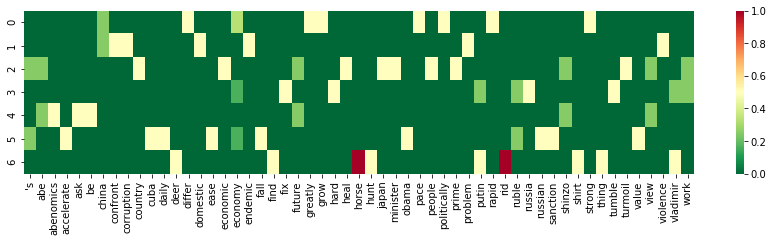

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 3))
sns.heatmap(tb / tb.max().max(), cmap="RdYlGn_r", annot=False);